### Importing necessary library

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


### Here i am loading the preprocessed dataset so we can test our model

In [2]:
data_preprocessed = pd.read_csv("data_preprocessed.csv")


In [3]:
data_preprocessed.head(3)

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1


### Here are all the necessary steps to scale the data so we can test it

In [4]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [6]:
inputs_scaled = scaler.transform(inputs)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## Here i am importing my model named 'my_trained_mode.pkl' and saving it into a variable named loaded_model

In [8]:
import joblib

In [9]:
loaded_model = joblib.load('my_trained_mode.pkl')


/home/abubakar/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Here i am checking the weights and bias to check my model is working fine

In [10]:
y_hat = loaded_model.predict(x_train)

In [11]:
loaded_model.score(x_train,y_train)

0.7415645182486199

In [12]:
loaded_model.intercept_

np.float64(9.413280072375791)

In [13]:
loaded_model.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

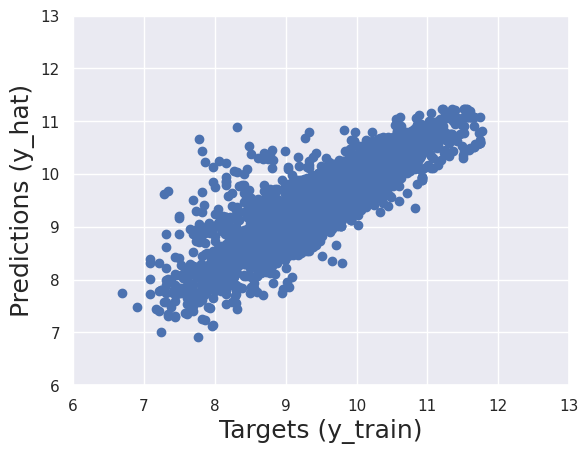

In [14]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

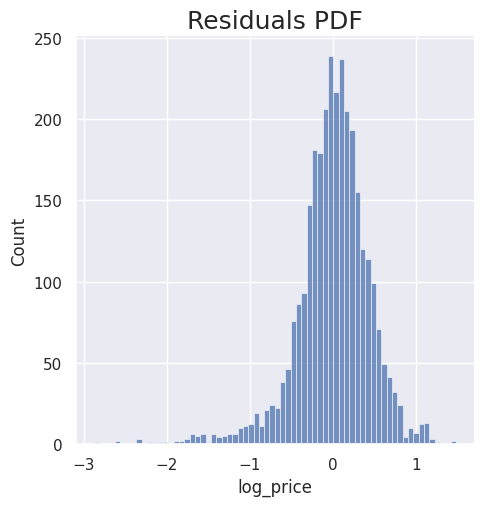

In [15]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [16]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = loaded_model.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


In [17]:
import gradio as gr

In [18]:
def predict_price(Mileage, EngineV, Brand, Body, Engine_Type, Registration):
    input_data = pd.DataFrame([[Mileage, EngineV, Brand, Body, Engine_Type, Registration]],
                              columns=['Mileage', 'EngineV', 'Brand', 'Body', 'Engine Type', 'Registration'])
    input_data = pd.get_dummies(input_data, drop_first=True)
    input_data = input_data.reindex(columns=inputs.columns, fill_value=0)
    input_data_scaled = scaler.transform(input_data)
    log_price_prediction = loaded_model.predict(input_data_scaled)
    price_prediction = np.exp(log_price_prediction)[0]
    return round(price_prediction, 2)

In [19]:
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Mileage"),
        gr.Number(label="Engine Volume"),
        gr.Dropdown(['BMW', 'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota', 'Volkswagen'], label="Brand"),
        gr.Dropdown(['hatch', 'other', 'sedan', 'vagon', 'van'], label="Body Type"),
        gr.Dropdown(['Gas', 'Other', 'Petrol'], label="Engine Type"),
        gr.Radio(['yes', 'no'], label="Registration")
    ],
    outputs=gr.Textbox(label="Predicted Price")
)

In [ ]:
interface.launch(debug=True)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
